In [1]:
import pandas as pd 

housing_df = pd.read_csv('housing.csv')
housing_df = housing_df[['MedInc', 'Latitude', 'Longitude']]


print(housing_df.head())

   MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25


In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
housing_df['cluster_labels'] = kmeans.fit_predict(housing_df)



print(housing_df)


       MedInc  Latitude  Longitude  cluster_labels
0      8.3252     37.88    -122.23               2
1      8.3014     37.86    -122.22               2
2      7.2574     37.85    -122.24               2
3      5.6431     37.85    -122.25               2
4      3.8462     37.85    -122.25               1
...       ...       ...        ...             ...
20635  1.5603     39.48    -121.09               1
20636  2.5568     39.49    -121.21               1
20637  1.7000     39.43    -121.22               1
20638  1.8672     39.43    -121.32               1
20639  2.3886     39.37    -121.24               1

[20640 rows x 4 columns]


In [3]:
print(housing_df)

       MedInc  Latitude  Longitude  cluster_labels
0      8.3252     37.88    -122.23               2
1      8.3014     37.86    -122.22               2
2      7.2574     37.85    -122.24               2
3      5.6431     37.85    -122.25               2
4      3.8462     37.85    -122.25               1
...       ...       ...        ...             ...
20635  1.5603     39.48    -121.09               1
20636  2.5568     39.49    -121.21               1
20637  1.7000     39.43    -121.22               1
20638  1.8672     39.43    -121.32               1
20639  2.3886     39.37    -121.24               1

[20640 rows x 4 columns]


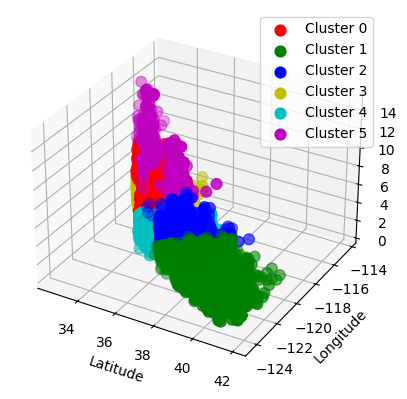

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lables = housing_df['cluster_labels']
feature1 = 'Latitude'
feature2 = 'Longitude'
feature3 = 'MedInc'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm']


for i in range(6):
    cluster_data = housing_df[housing_df['cluster_labels'] == i]
    ax.scatter(cluster_data['Latitude'], 
               cluster_data['Longitude'], 
               cluster_data['MedInc'], 
               c=colors[i], 
               label=f'Cluster {i}',
               s=60) 


    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)



plt.legend()
plt.show()



In [5]:
#Split into train and test set 
from sklearn.model_selection import train_test_split

X = housing_df.drop(columns='cluster_labels')
y = housing_df['cluster_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [6]:
y_test.shape
X_test.shape

(4128, 3)

### Random Forest 

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

report = classification_report(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(report)

0.9939437984496124
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       1.00      0.99      1.00       960
           2       0.99      1.00      0.99       519
           3       1.00      1.00      1.00      1388
           4       1.00      0.99      0.99       338
           5       0.98      0.95      0.97       106

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [9]:
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9939


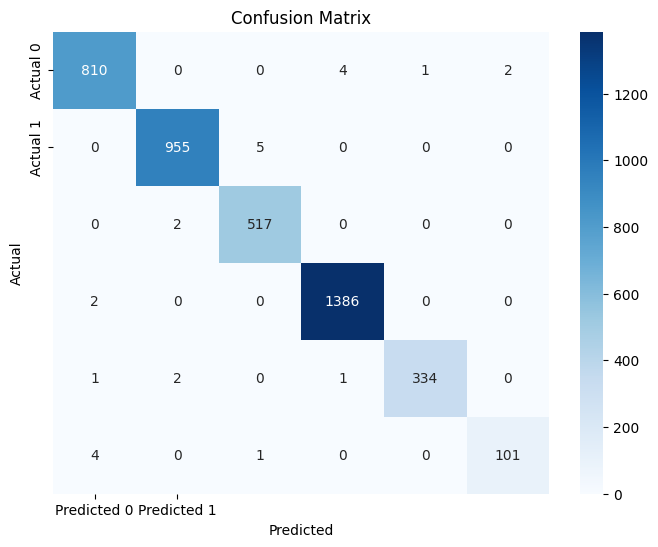

In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


#Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### XG Boost

In [11]:

%pip install xgboost
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Note: you may need to restart the kernel to use updated packages.


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#print(report)

Accuracy: 0.9937015503875969


### Naives Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB


# Step 4: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9648740310077519
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       817
           1       0.96      0.95      0.95       960
           2       0.91      0.94      0.93       519
           3       0.98      1.00      0.99      1388
           4       0.97      0.93      0.95       338
           5       0.94      0.86      0.90       106

    accuracy                           0.96      4128
   macro avg       0.96      0.94      0.95      4128
weighted avg       0.96      0.96      0.96      4128



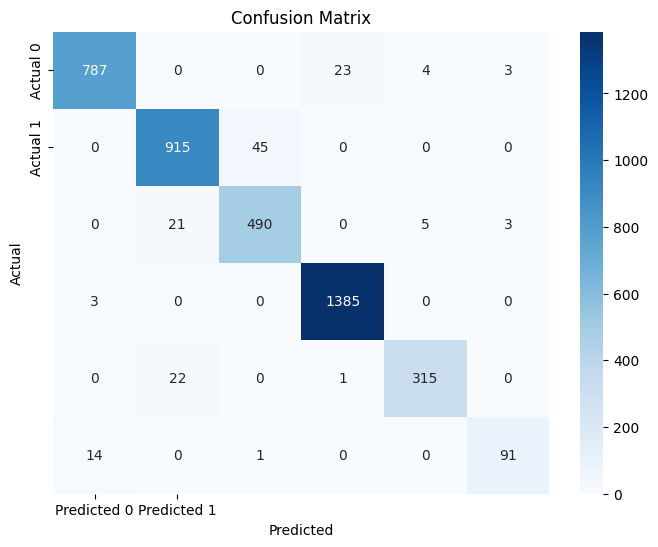

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


#Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Logistic Regression (Multinomial)

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
Accuracy: 0.9900678294573644
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       817
           1       0.98      1.00      0.99       960
           2       0.99      0.98      0.99       519
           3       1.00      0.99      1.00      1388
           4       0.99      0.96      0.97       338
           5       0.98      0.96      0.97       106

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128



In [17]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# Train KNN Model
model = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
model.fit(X_train, y_train)

#  Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9917635658914729
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      1.00      0.99       960
           2       1.00      0.99      0.99       519
           3       0.99      0.99      0.99      1388
           4       0.99      0.99      0.99       338
           5       0.99      0.95      0.97       106

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [19]:
from pickle import dump

dump(model, open("k_means.sav", "wb"))
